In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
import networkx.algorithms.community as nx_comm
import pandas as pd
import matplotlib.cm as cm
from itertools import product
import copy

In [ ]:
df = pd.read_csv('/content/aves-weaver-social.edges.txt',sep=' ')
dfl = df.to_numpy()

In [ ]:
df

,1,2,0
0,1,3,0
1,2,3,0
2,4,5,0
3,4,6,0
4,4,7,0
...,...,...,...
1420,433,240,22
1421,437,252,22
1422,437,240,22
1423,248,444,22


**INBUILT LOUVAIN ALGORITHM**

In [ ]:
G = nx.from_pandas_edgelist(df,'1','2')
partition = community_louvain.best_partition(G)

[Text(0, 0, '27'),
 Text(0, 0, '22'),
 Text(0, 0, '21'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

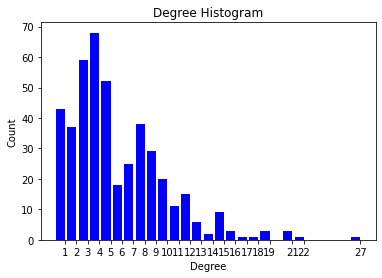

In [ ]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

(array([0.15211755, 0.11218669, 0.12929991, 0.0988764 , 0.03422645,
        0.11979257, 0.05514261, 0.03802939, 0.02091616, 0.02852204,
        0.01140882, 0.02091616, 0.00570441, 0.00190147, 0.00190147,
        0.00570441, 0.00570441, 0.00190147, 0.        , 0.        ,
        0.        , 0.00190147]),
 array([ 1.        ,  2.18181818,  3.36363636,  4.54545455,  5.72727273,
         6.90909091,  8.09090909,  9.27272727, 10.45454545, 11.63636364,
        12.81818182, 14.        , 15.18181818, 16.36363636, 17.54545455,
        18.72727273, 19.90909091, 21.09090909, 22.27272727, 23.45454545,
        24.63636364, 25.81818182, 27.        ]),
 <a list of 22 Patch objects>)

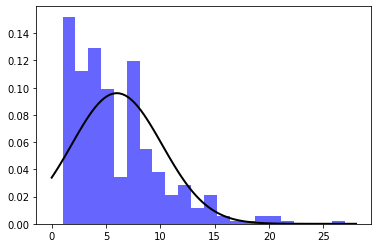

In [ ]:
from scipy.stats import norm

data = degree_sequence

mu, std = norm.fit(data) 

xmin, xmax = min(data)-1,max(data)+1

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.hist(data, bins=len(cnt), density=True, alpha=0.6, color='b')

In [ ]:
nodes = [i for i in range(1,len(G.nodes())+1)]

In [ ]:
pos = nx.nx_pydot.graphviz_layout(G)

In [ ]:
fig = plt.figure(figsize=(40,35),dpi=400)
cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G,pos)
# plt.savefig("louvain_applied_total_graph.png",dpi=150)

**LOUVAIN ALGORITHM RECREATION**

In [ ]:
A = nx.to_numpy_array(G)

m=0
for i in range(len(G.nodes())):
  for j in range(len(G.nodes())):
    m += A[i][j]
m = m/2 

In [ ]:
# def modularity(G, partition):
#     """Returns the modularity of the partition of an undirected graph G.

#     Definition as given in:
#         M. E. J. Newman. Networks: An Introduction, page 224.
#     Oxford University Press, 2011.

#     """
#     m = G.size()
#     degrees = dict(G.degree(weight="weight"))
#     Q = 0
#     for community in partition:
#         for u, v in product(community, repeat=2):
#             try:
#                 w = G[u][v].get("weight", 1)
#             except KeyError:
#                 w = 0
#             if u == v:
#                 # Double count self-loop weight.
#                 w *= 2
#             Q += w - degrees[u] * degrees[v] / (2 * m)
#     return Q / (2 * m)

def modularity(array,G):
  ta = []
  for i in range(len(array)):
    ta.append(set(array[i]))
  mod = nx_comm.modularity(G,ta) 
  return mod 

def shift_from(array,a,b):
  for i in range(len(array)):
    if(a in array[i]):
      array[i].remove(a)
      array[b].append(a)
      break

  for i in range(len(array)):
        if(len(array[i])==0):
          del array[i]       
  return array

In [ ]:
C_ini = []
for i in range(len(G.nodes())):
  C_ini.append([i])

In [ ]:
cin = [[i] for i in nodes]

for i in nodes:
  mod = []
  for j in range(len(cin)):
    modified = shift_from(cin,i,j)
    mod.append(modularity(modified,G))
  k = mod.index(max(mod))
  cin = shift_from(cin,i,k)

cin

IndexError: ignored

In [ ]:
B = [[1,2,4],[7,89],[3,4]]

In [ ]:
shift_from(B,1,2)

[[2, 4], [7, 89], [3, 4, 1]]

In [ ]:
len(new_list)

98790

In [ ]:
m = G.size()

1334